# Learning from Data: Workshop 3

This workshop is not assessed, but if you hand-in the completed notebook, I'll give you formative feedback on it.


In [1]:
%pylab inline
figsize(10, 8)

Populating the interactive namespace from numpy and matplotlib


## PDFs and histograms

 Generate 1000 uniformly distributed
  samples from a Normal/Gaussian density with zero mean and variance 1,
  $x_n \sim \mathcal{N}(0, 1)$, using the <code>randn</code> function.

In [2]:
rand_1000 = randn(1000)
print mean(rand_1000) # should be close to 0
print var(rand_1000) # should be close to 1

-0.0176016512221
0.94690860309


Plot a histogram of the samples using the <code>hist</code> function. By
  default \matlab uses 10 bins, but experiment with changing the number of
  bins.    The number of samples you would expect to fall in a histogram bin of
  width $\Delta$ centred at $x$ would be $p(x) \Delta$ where $p(x)$ is the
  probability density function (pdf).  Since you know the pdf for this
  Gaussian density (mean $0$ and variance $1$) is
  \begin{equation*}
    p(x) = \frac{1}{\sqrt{2\pi}} \exp
    \left\{
      -\frac{x^2}{2}
    \right\}
  \end{equation*}
  compare the histogram with the expected number of samples by drawing the
  curve of the expected number of samples over the histogram.
  Calling <code>hist</code> like <code>counts, edges, patches = hist(...)</code> will return the counts in each bin, the locations of the bin edges (and the graphical patches making the histogram figure) to help work
  out the relevant $x$ and $\Delta$ for each bin; see
  the doc-string for <code>hist</code>.

  What are the trade-offs involved in choosing the
  number of bins?  What do you think is the best number of bins for these data? Why?

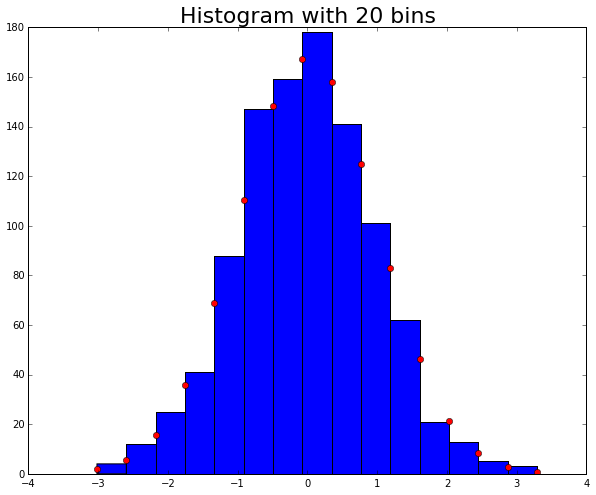

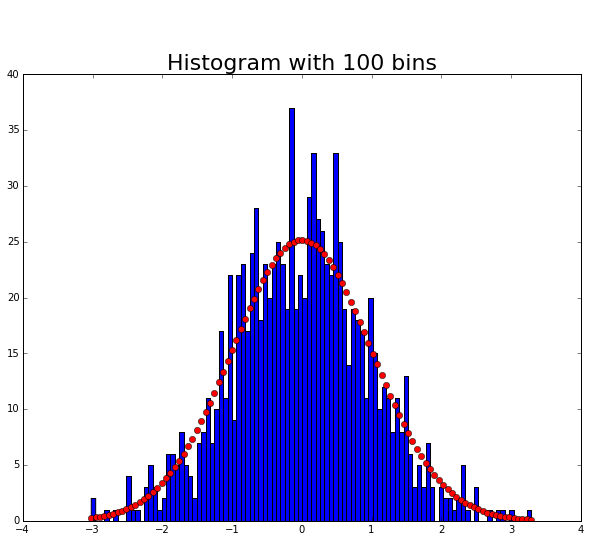

In [36]:
import scipy.stats
def compute_expected_count(edges):
    delta = edges[1] - edges[0]

    expected_count = array([])
    for i in range(0, edges.size):
        # compute expected count
        # TODO: maybe use the point between two neighbour edges
        val = scipy.stats.norm.pdf(edges[i])*delta*1000
        expected_count = np.append(expected_count, val)
    return expected_count



title('Histogram with 20 bins', fontsize=22)
plot(edges, compute_expected_count(edges), 'ro', label='Normal')

figure()

counts, edges, patches = hist(rand_1000, bins=100)
title('\n\nHistogram with 100 bins', fontsize=22)
plot(edges, compute_expected_count(edges), 'ro', label='Normal')

> ### Answer
Choosing fewer bins allows us to clearly see the general picture of the data while avoiding the unnecessary precision and noise that comes when choosing larger number of bins. In either case we can easily infer that the data is normally distributed, except that choosing large number of bins allows you to observe the data's distribution in more detail, which may or may not be of need. So the best number of bins really depends on your needs and the properties of data that you want to infer/observe.

### PDFs and expectations.

 Generate 1000 uniformly distributed
 samples $x_n \sim \mathcal{U}(0,1)$ using the  <code>rand</code>
  function.  Plot a histogram of them using the function <code>hist</code>.

  Write a little function to find the variance of the samples and check
  your result using the <code>var</code> function. Work out an expression for
  the variance as the expected value:
  \begin{align*}
    \mathbb{E}((x-\mu)^2) &= \int (x-\mu)^2 p(x)\,dx\\
    &= \int_0^1  (x-\mu)^2 \,dx
  \end{align*}
  (For simplicity, assume that you know the mean, $\mu = 0.5$.)

  Calculate the variance using $5, 10, 20, 50, 100, 500, \ldots $ samples:
  how does the sample variance behave as the number of samples increases?

  Generalise your result for the variance of  $\mathcal{U}(0,1)$ to
  $\mathcal{U}(a,b)$.  If you're feeling like an exercise in integration (it's good for the soul),
  show that the variance of a Gaussian density
  \begin{equation*}
    p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp
    \left\{
      -\frac{x^2}{2\sigma^2}
    \right\}
  \end{equation*}
  is $\sigma^2$.


0.0861234475727
0.0859798752416


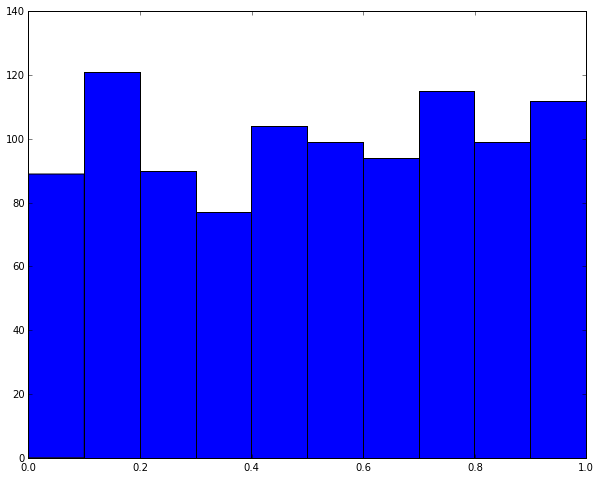

In [33]:
rand_1000_2 = rand(1000)
a = hist(rand_1000_2, bins=10)

def my_var(sample):
    return sum((sample - 0.5)**2)/sample.size

# Roughly the same:
print my_var(rand_1000_2)
print var(rand_1000_2)

Calculate the variance using 5,10,20,50,100,500,… samples: how does the sample variance behave as the number of samples increases?

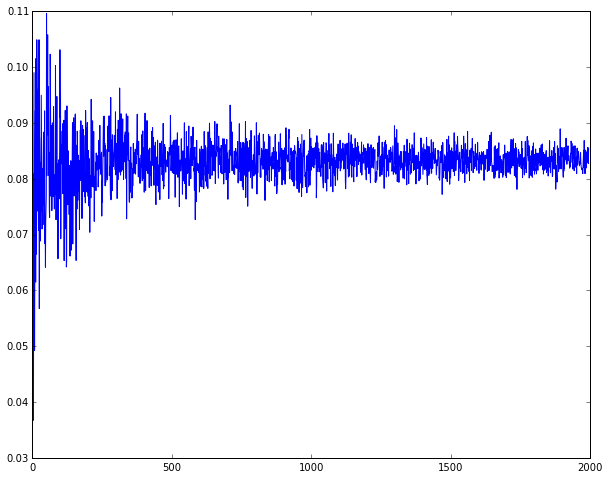

In [5]:
vars = array([])
for sample_size in xrange(5, 2000):
    vars = np.append(vars, var(rand(sample_size)))
        
plot(range(0,vars.size), vars)

> ### Answer:
The variance decreases in magnitude as the number of samples increases.

### Transformation of probabilities

This exercise
  is designed to illustrate the transformation of probabilities  in
  one dimension.

  Generate, say, 10000 samples from a Gaussian density with mean 1 and
  variance 2.   Use the <code>hist</code> function to plot a histogram of
  the density with 50 bins.  What fraction  of your samples fall in an
  interval of width $0.1$ centred on $x = 2$?  This approximates the
  probability mass $p(x)$ at $x = 2$.

0.965449819907
2.10063211311
Fraction os samples in 0.1-interval around 2:  0.00539909665132


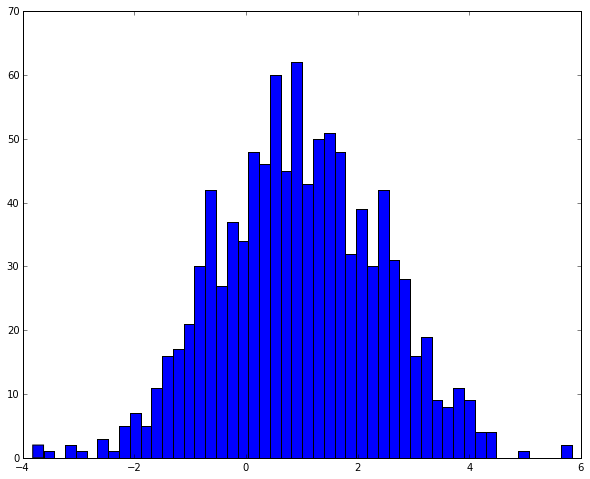

In [46]:
rand_1000_3 = randn(1000)*sqrt(2)+1
print mean(rand_1000_3) # should be close to 1
print var(rand_1000_3) # should be close to 2

counts, edges, patches = hist(rand_1000_3, bins=50)
print "Fraction os samples in 0.1-interval around 2: ", scipy.stats.norm.pdf(2)*0.1

  Now linearly transform the samples according to $ y = f(x) = a x + b$ where
  $a = 2$ and $b = 3$.  Plot another histogram of the transformed samples $y$.  To what
  point $y$ is the point $ x = 2$ transformed?  What fraction of your
  transformed samples lie in an interval of width $0.1$ centred on $
  f(2)$.  The fractions should be related by:
  \begin{equation*}
    p(y) = \frac{p(x)}{|df/dx|}
  \end{equation*}
  where $\frac{df}{dx}$ is the gradient of $f(x)$ at 2.

  Repeat the experiment using $f(x) = x^3$; make sure you know what is
  going on. Finally repeat, and
  explain, the experiment when $f(x) = x^2$; note that in this case
  $f(2) = f(-2)$ so that probability mass at $y = 4$ comes from two
  points in $x$.

Linear Transformation:

Point 2 has been linearly transformed to  7
Fraction os samples in 0.1-interval around 7:  0.00269954832566
--------------------------------------------------------------- 

Cubic Transformation:

Point 2 has been cubicly transformed to  8
Fraction os samples in 0.1-interval around 8:  2.8120295059e-05
--------------------------------------------------------------- 

Square Transformation:

Point 2 has been cubicly transformed to  4
Fraction os samples in 0.1-interval around 4:  0.00134977416283


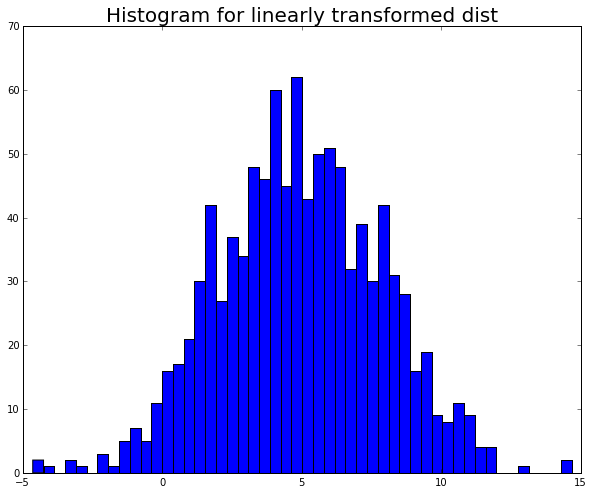

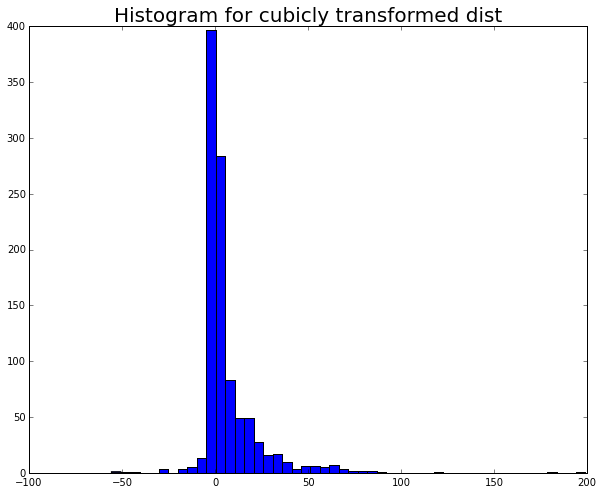

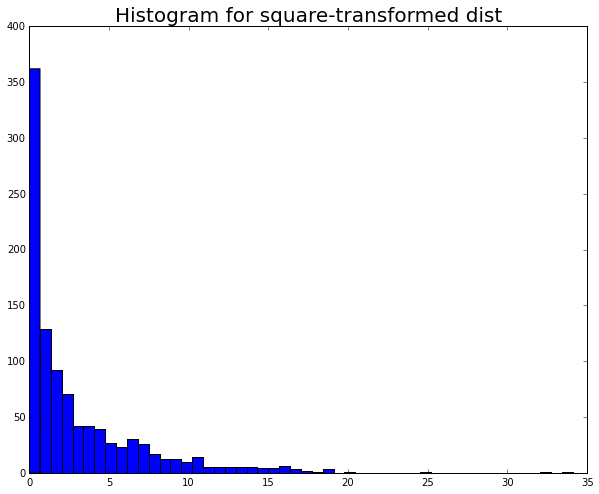

In [169]:
def _break():
    print "-"*63, "\n"
    figure()

print "Linear Transformation:\n"
def linear_transform(x):
    return 2*x+3

rand_1000_3_lin = linear_transform(rand_1000_3)

print "Point 2 has been linearly transformed to ", linear_transform(2)
title('Histogram for linearly transformed dist', fontsize=20)
counts, edges, patches = hist(rand_1000_3_lin, bins=50)

# Either one is correct
# print "Fraction os samples in 0.1-interval around 7: ", scipy.stats.norm.pdf(linear_transform(2), 3, 2)*0.1
print "Fraction os samples in 0.1-interval around 7: ", (scipy.stats.norm.pdf(2)/2)*0.1

_break()

print "Cubic Transformation:\n"
def cubic_transform(x):
    return x**3

def cubic_transform_dif(x):
    return 3*x**2

rand_1000_3_cub = cubic_transform(rand_1000_3)

print "Point 2 has been cubicly transformed to ", cubic_transform(2)
title('Histogram for cubicly transformed dist', fontsize=20)
counts, edges, patches = hist(rand_1000_3_cub, bins=50)

# Either one is correct
print "Fraction os samples in 0.1-interval around 8: ", (scipy.stats.norm.pdf(2)/cubic_transform_dif(cubic_transform(2)))*0.1



_break()

print "Square Transformation:\n"
def square_transform(x):
    return x**2

def square_transform_dif(x):
    return 2*x

rand_1000_3_sq = square_transform(rand_1000_3)

print "Point 2 has been cubicly transformed to ", square_transform(2)
title('Histogram for square-transformed dist', fontsize=20)
counts, edges, patches = hist(rand_1000_3_sq, bins=50)

# Either one is correct
print "Fraction os samples in 0.1-interval around 4: ", (scipy.stats.norm.pdf(2)/square_transform_dif(square_transform(2)))*0.1+(scipy.stats.norm.pdf(-2)/square_transform_dif(square_transform(2)))*0.1

### Question
Finally repeat, and
  explain, the experiment when $f(x) = x^2$; note that in this case
  $f(2) = f(-2)$ so that probability mass at $y = 4$ comes from two
  points in $x$.
  
### Answer
Given that the probability mass at $y = 4$ comes from two points in $x$, we need to compute the sum of probability masses at both points in $x$ to find out probability mass at $y = 4$, i.e.:

\begin{equation*}
p_{y}(4) = \frac{p_{x}(2)}{\left|{\displaystyle\frac{df(4)}{dx}}\right|}·\frac{p_{x}(-2)}{\left|{\displaystyle\frac{df(4)}{dx}}\right|} = \frac{p_{x}(2)}{8}·\frac{p_{x}(-2)}{8}
\end{equation*}

### Gaussian densities

Here is a little demo of sampling from a Gaussian density in two dimensions.

First create a mean vector and a covariance matrix:

In [241]:
mu = np.array([3, 2])
print "Mean"
print mu


Sigma = np.array([[5.5, -4.5], [-4.5,5.5]])
print "Covariance"
print Sigma

Mean
[3 2]
Covariance
[[ 5.5 -4.5]
 [-4.5  5.5]]


We need a function to evaluate the pdf of a Normal density.  Surprisingly one isn't readily available, so here's one:

In [242]:
def gaussian_pdf(x, mu, Sigma):
    """
    Evaluate the probability of each row of x using a multivariate Gaussian density
    with mean mu and covariance Sigma.
    """
    assert len(mu.shape) == 1
    assert len(Sigma.shape) == 2
    d = mu.shape[0]
    assert d == Sigma.shape[0] and d == Sigma.shape[1]
    invSigma = np.linalg.inv(Sigma)    # Should be invertible
    dx = x - mu
    fact = np.sum(np.dot(dx, invSigma)*dx, axis=1)
    p = np.exp(-fact/2)/np.sqrt((2*np.pi)**d*np.linalg.det(Sigma))
    return p
    

s (50, 40) (2000, 2) (50,) (40,)
xy.shape: (2000, 2)
p.shape: (2000,)


(-6.0, 10.0, -4.0, 10.0)

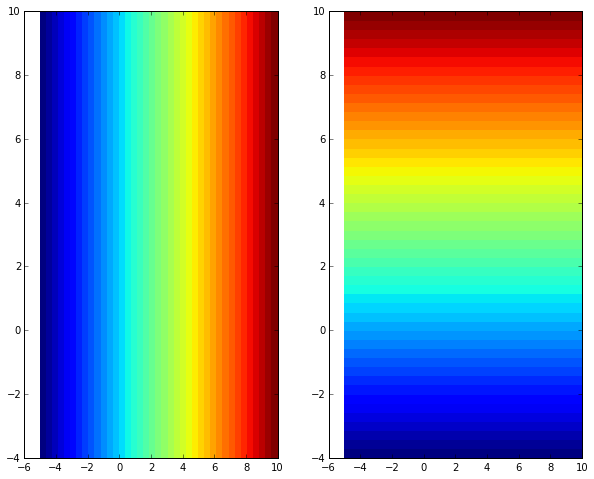

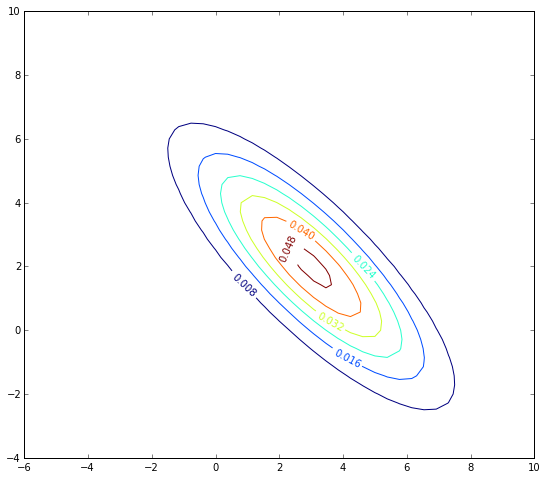

In [250]:
# Plot contours of probability over a region (-5, 10) x (-4, 10)
# In this cell we just set up the grid of locations at which the pdf will be evaluated.
Nx = 40
Ny = 50
cx = linspace(-5, 10, Nx)
cy = linspace(-4, 10, Ny)

xx, yy = meshgrid(cx, cy)
# xx  and yy contain the x and y coordinates for the grid.  Plot them to see what's going on.
subplot(1,2,1)
pcolor(cx, cy, xx)
subplot(1,2,2)
pcolor(cx, cy, yy)

print "s", xx.shape, xy.shape, cy.shape, cx.shape
# Turn the separate x and y locations into a matrix where each row is a single (x,y) location
xy = vstack((xx.ravel(), yy.ravel())).T
print "xy.shape:", xy.shape

# Evaluate the pdf at every point on the grid. 
p = gaussian_pdf(xy, mu, Sigma)
print "p.shape:", p.shape
p = reshape(p, xx.shape)
figure()
cplot = contour(cx, cy, p)
clabel(cplot, inline=1, fontsize=10)
axis('scaled')

In [186]:
print meshgrid

<function meshgrid at 0x104d319b0>


(-6.0, 10.0, -4.0, 10.0)

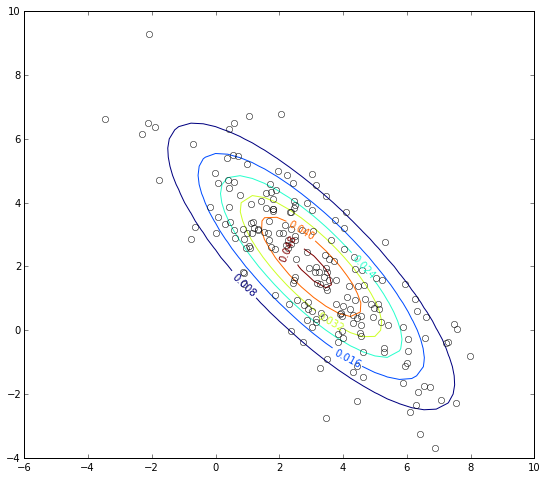

In [244]:
# Draw the contours again with some samples on top 
cplot = contour(cx, cy, p)
clabel(cplot, inline=1, fontsize=10)

# Draw some samples using the multivariate_normal function
from numpy.random import multivariate_normal
samples = multivariate_normal(mu, Sigma, 200)
plot(samples[:,0], samples[:,1], 'bo', markerfacecolor='none')
axis('scaled')

In a similar manner to above, plot
  200 samples and contours of two-dimensional Gaussian density
  functions with the following means and covariances:
  \begin{align*}
    \newcommand{\bmu}{\boldsymbol{\mu}}
     \bmu &=
     \begin{bmatrix}
       1.0\\ 0.0
     \end{bmatrix} \qquad\qquad
     \Sigma =
     \begin{bmatrix}
       0.2 & 0.0\\
       0.0 & 0.4
     \end{bmatrix}\\
     \bmu &=
     \begin{bmatrix}
       1.0\\ 0.0
     \end{bmatrix} \qquad\qquad
     \Sigma =
     \begin{bmatrix}
       0.4 & 0.05\\
       0.05 & 0.1
     \end{bmatrix}\\
     \bmu &=
     \begin{bmatrix}
       1.0\\ 1.0
     \end{bmatrix} \qquad\qquad
     \Sigma =
     \begin{bmatrix}
       0.1 & 0.0\\
       0.0 & 0.1
     \end{bmatrix}\\
   \end{align*}

Make sure that you use the <code>axis('scaled')</code> command to 
ensure that the axes are scaled so that circles come out as circles and
not as ellipses.  This is important in order to relate the shape of the
contours to the covariance matrices.  In each case say what in the
covariance matrices gives the contours of constant probability their
particular shape and orientation.

For each of the Gaussians calculate the covariance matrix directly
from the samples and make sure that it (approximately) corresponds to
the covariance matrix you used to generate the samples. Either use <code>cov</code> or, 
just as easy, write your own.

Sigma_1 vs Cov of the sample_1:

[[ 0.2  0. ]
 [ 0.   0.4]] 

[[ 0.21885236  0.00442923]
 [ 0.00442923  0.43173376]] 

Sigma_2 vs Cov of the sample_2:

[[ 0.4   0.05]
 [ 0.05  0.1 ]] 

[[ 0.34196146  0.02123617]
 [ 0.02123617  0.07653694]] 

Sigma_3 vs Cov of the sample_3:

[[ 0.1  0. ]
 [ 0.   0.1]] 

[[ 0.1002214 -0.0052031]
 [-0.0052031  0.1091475]] 



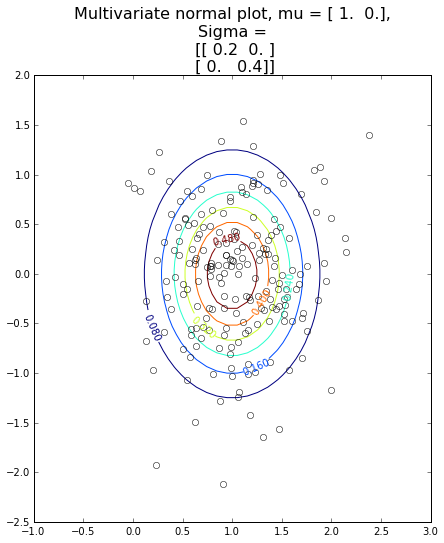

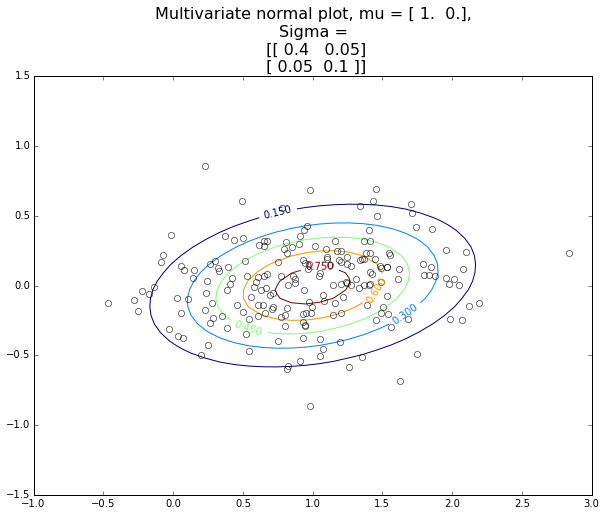

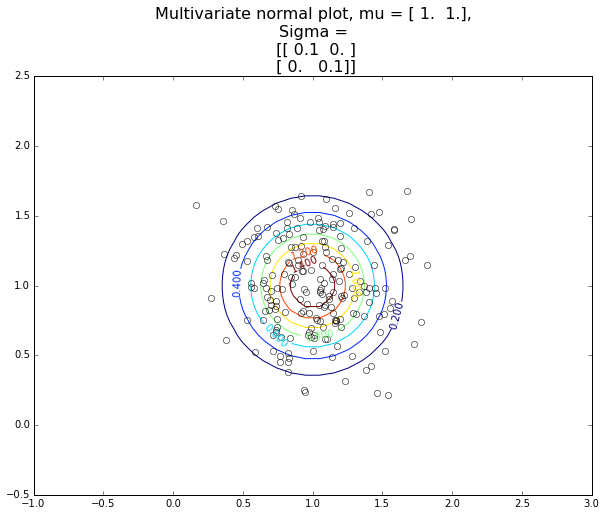

In [508]:
mu_1 = np.array([1.0, 0.0])
mu_2 = np.array([1.0, 0.0])
mu_3 = np.array([1.0, 1.0])
Sigma_1 = np.array([[0.2, 0.0], [0.0, 0.4]])
Sigma_2 = np.array([[0.4, 0.05], [0.05, 0.1]])
Sigma_3 = np.array([[0.1, 0.0], [0.0, 0.1]])

def plot_samples(mu, Sigma, graph_range):
    Nx = 40
    Ny = 50
    cx = linspace(graph_range[0][0], graph_range[0][1], Nx)
    cy = linspace(graph_range[1][0], graph_range[1][1], Ny)

    xx, yy = meshgrid(cx, cy)

    # Turn the separate x and y locations into a matrix where each row is a single (x,y) location
    xy = vstack((xx.ravel(), yy.ravel())).T

    # Evaluate the pdf at every point on the grid. 
    p = gaussian_pdf(xy, mu, Sigma)
    p = reshape(p, xx.shape)
    cplot = contour(cx, cy, p)
    clabel(cplot, inline=1, fontsize=10)

    # Draw some samples using the multivariate_normal function
    samples = multivariate_normal(mu, Sigma, 200)
    plot(samples[:,0], samples[:,1], 'bo', markerfacecolor='none')
    axis('scaled')
    title('Multivariate normal plot, mu = %s,\nSigma =\n %s' % (mu, Sigma) , fontsize=16)
    figure()
    return samples


samples_1 = plot_samples(mu_1, Sigma_1, np.array([[-1, 3], [-2, 2]]))
samples_2 = plot_samples(mu_2, Sigma_2, np.array([[-1, 3], [-1.5, 1.5]]))
samples_3 = plot_samples(mu_3, Sigma_3, np.array([[-1, 3], [-0.2, 2.1]]))
print "Sigma_1 vs Cov of the sample_1:\n\n", Sigma_1, "\n\n", cov(samples_1.T), "\n"
print "Sigma_2 vs Cov of the sample_2:\n\n", Sigma_2, "\n\n", cov(samples_2.T), "\n"
print "Sigma_3 vs Cov of the sample_3:\n\n", Sigma_3, "\n\n", cov(samples_3.T), "\n"

> ### Question:
In each case say what in the covariance matrices gives the contours of constant probability their particular shape and orientation.

> ### Answer
In each case the covariance matrix describes the shape of the resulting elipsis. If both variances are roughly equal (i.e. `Sigma[0][0]` and `Sigma[1][1]`), then the resulting elipsis has a round shape (i.e. Xs and Ys are similarly deviating from their means). On the other hand, if one variance is substantially larger than the other, then the resulting elipsis is 'squashed' on the axis of the smaller variance and 'stretched' on the axis of the larger variance.

## Linear regression

Get the following little data set which contains one-dimensional data vectors $\mathbf{x}$ and $\mathbf{t}$.  They are stored as two columns, which the following cell splits into two vectors, <code>x</code> and <code>t</code>

In [343]:
try: 
    X = loadtxt('linreg.txt')
except IOError:
    !curl -O http://empslocal.ex.ac.uk/people/staff/reverson/ECM3420/linreg.txt
    X = loadtxt('linreg.txt')
print X.shape
x = X[:,0]
t = X[:,1]

(20, 2)


The data set <code>linreg.mat</code> on the ELE page
  contains data vectors   The data were generated
  according to
  \begin{equation*}
    t_n = w_0 + w_1 x_n + \epsilon_n
  \end{equation*}
  where $\epsilon_n$ is Gaussian-distributed noise: $\epsilon_n \sim
  \mathcal{N}(0, \sigma^2)$. Use linear regression to identify the coefficients
  $w_0$ and $w_1$.  Recall that to do this you need to set up a
  *design matrix* $\mathbf{X}$ that contains the features and the dummy
  feature $1$ to go with the bias coefficient $w_0$; thus
  \begin{align*}
    \mathbf{X} =
    \begin{bmatrix}
      1 & x_1\\
      1 & x_2\\
      1 & x_3\\
      \vdots & \vdots\\
      1 & x_N
    \end{bmatrix}
  \end{align*}
  With $\mathbf{X}$ on hand, you can find the coefficients from:
  \begin{align*}
    \mathbf{w} = \mathbf{X}^\dagger \mathbf{t}
  \end{align*}
  where  $\mathbf{t}$ is the vector of the targets and $\mathbf{X}^\dagger$ is the
  pseudo-inverse of $\mathbf{X}$. Use <code>np.linalg.pinv</code> or 
  construct it yourself as $\mathbf{X}^\dagger = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ -- see the lecture slides.

  Plot the data and the
  regression line.  Measure the correlation between the features and
  targets.  How does it relate to the coefficients?

  Estimate the variance of the noise by find the variance of the
  differences between your prediction of the targets and the actual
  targets.  Thus if $y_n = w_0 + w_1 x_n$ is the prediction of the $n$th
  target, then you could estimate the variance $\sigma^2$ as:
  \begin{align*}
    \sigma^2 = \frac{1}{N} \sum_{n=1}^N (t_n - y_n)^2
  \end{align*}

Correlation between the features and targets: 
[[ 1.          0.97515055]
 [ 0.97515055  1.        ]]

Variance of the differences between your prediction of the targets and the actual targets:  0.180173702915


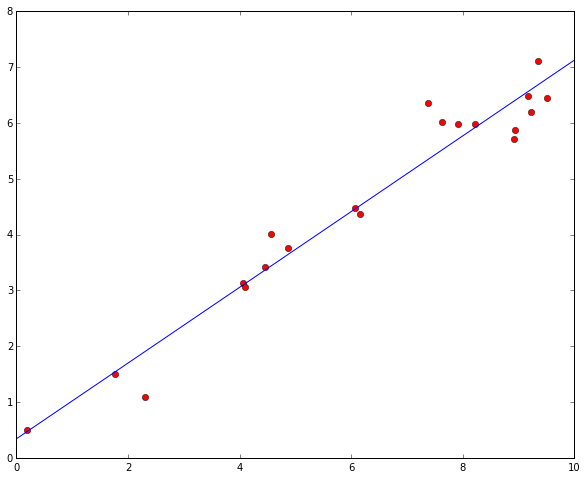

In [501]:
x = np.matrix(x) # make x a matrix
ones = np.matrix(np.ones(x.size))
x_m = np.hstack([ones.T, x.T])
w = np.dot(np.linalg.pinv(x_m), t)
w0 = np.array(w)[0][0]
w1 = np.array(w)[0][1]
x = np.array(x)[0] # make x an array again

def data_func(w0, w1, x):
    return w0 + w1*x


_cx = linspace(0, 10, 10)

plot(x, t, 'ro', label='Normal')
plot(_cx, data_func(w0, w1, _cx), 'b-', label='Normal')

#  Measure the correlation between the features and targets:
print "Correlation between the features and targets: \n", corrcoef(x, t)

y = data_func(w0, w1, x)

target_var = sum(((t - y)**2)/t.size)

print "\nVariance of the differences between your prediction of the targets and the actual targets: ", target_var

> ### Question
Does your estimate of the variance make sense in terms of the average deviation of the targets from the prediction?

> ### Answer
As seen from the graph above, the actual data points are very close to the regression line and are often located on the lines itself. A very small variance of 0.18 thus seems in tact whith what we see on the graph (i.e. very small deviations from the regression line).

_This will probably appear as part of the next (assessed) workshop too, so now might be a good time to do it!_

## Robust linear regression

Standard regression analysis minimises the  squared
error between the regression line and the data, namely:
\begin{equation*}
    E_2(\mathbf{w}) = \sum_{n=1}^N (t_n - y_n(\mathbf{x}; \mathbf{w}) )^2
  \end{equation*}
  where $y_n(\mathbf{w}) = w_0 + w_1 x_n$ and $\mathbf{w} = (w_0, w_1)$. Recall that the
  sum of squares error function $E_2$ comes from the negative log
  likelihood and the assumption that the errors are normally (Gaussian) distributed.

A heavy-tailed distribution that is more appropriate if there are
  occasional large deviations from the systematic trend is the Laplacian
  distribution:
  \begin{align*}
    p(\epsilon_n) = p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) \propto \exp
    \left\{
      - \frac{| \epsilon_n | }{\sigma}
    \right\}
  \end{align*}
  Substitute this expression for $ p(t_n \,|\, \mathbf{x}_n, \mathbf{w})$ into the
  general expression for an error function $E(\mathbf{w}) = -\sum_{n=1}^N \log
  p(t_n \,|\, \mathbf{x}_n, \mathbf{w}) $ to show that the error function that arises
  from this noise distribution is
  \begin{equation*}
    E_1(\mathbf{w}) = \sum_{n=1}^N |t_n - y_n(\mathbf{x}; \mathbf{w}) |
  \end{equation*}


You can (hand)write this out on paper  rather than typing it out in LaTeX.

The file <code>outlier.txt</code> contains the same data as the one-dimensional linear regression data that you used last workshop.  You can download it and split it into features and targets with the following.

In [197]:
try: 
    X = loadtxt('outlier.txt')
except IOError:
    !curl -O http://empslocal.ex.ac.uk/~reverson/ECM3420/outlier.txt
    X = loadtxt('outlier.txt')
print X.shape
x = X[:,0]
t = X[:,1]

(20, 2)


Plot $t_n$ versus $x_n$ and find the
  linear regression line for these data using $E_2$. Notice how the
  regression line is grossly affected by the single outlier.


Write a
  routine to fit a find a straight fitting the data by minimising
  $E_1(\mathbf{w})$.  Note that the pseudo-inverse will not work here.  One
  possibility is to find the minimum error by trying a grid of combinations
  of $w_0$ and $w_1$.  From your plot of the data you should be able to
  estimate appropriate ranges of $w_0$ (the intercept) and $w_1$ (the
  gradient) to search.   If you adopt this approach it is nice to plot a
  contour or <code>pcolor</code> representation of $E_1(\mathbf{w})$ as a function of
  $w_0$ and $w_1$.

   Plot and compare your fitted line with the line derived from the
  squared error (all on the same graph).

  Searching a grid like this works well when there are just two
  coefficients to be found, but is computationally very expensive when
  there are many. An alternative is to use a numerical minimiser such as
  <code>scipy.optimize.fmin</code> to locate the minimum -- you might start the search
  at the solution to the $E_2$ problem.  For example, the following cell will minimise the bannana function of two variables from the starting point <code>x0</code>.

In [198]:
import scipy.optimize

def banana(x):
     return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

xopt = scipy.optimize.fmin(func=banana, x0=[-1.2,1])

print xopt

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 159
[ 1.00002202  1.00004222]
